## Quantum Principal Component Analysis (qPCA)

Principal Component Analysis (PCA) is a powerful technique in classical data analysis for dimensionality reduction. In quantum computing, qPCA can be leveraged to find the principal components of quantum data more efficiently. Quantum Principal Component Analysis has the potential to significantly speed up data analysis processes, especially for high-dimensional quantum data. Understanding how to implement and use qPCA is essential for leveraging quantum computers in data science and machine learning tasks.

PCA is a cornerstone of classical data analysis, transforming high-dimensional data into a lower-dimensional form while preserving variance. It reveals hidden patterns and structures, aiding in feature extraction and noise reduction. This enhances the performance of downstream machine learning algorithms. Quantum Principal Component Analysis (qPCA) takes PCA principles and leverages quantum computing to perform these operations more efficiently. Quantum algorithms can potentially solve PCA problems exponentially faster, crucial for large datasets in fields like genomics, finance, and AI. qPCA also naturally processes quantum data, which classical computers struggle with.

One of qPCA's significant advantages is its ability to handle high-dimensional data efficiently. Quantum computers excel in dealing with large datasets due to their inherent parallelism. This makes qPCA useful for tasks involving vast data, such as image recognition, NLP, and scientific simulations, enabling quicker insights and decision-making. The potential applications of qPCA are vast. In finance, it can analyze market trends. In healthcare, it can help analyze genomic data for personalized medicine. In AI, it can improve machine learning models by reducing data dimensionality. qPCA also opens new possibilities in quantum machine learning and quantum chemistry.

To leverage qPCA, it's essential to understand its implementation. This involves creating quantum circuits representing data's principal components, initializing quantum states, and using simulators to analyze results. Mastering these techniques unlocks quantum computing's full potential for data analysis. Implementing qPCA in Qiskit provides a practical way to explore and apply these concepts. As quantum technology advances, qPCA is set to become a standard data analysis tool. Its efficiency with large datasets will revolutionize many fields. Researchers who utilize qPCA will drive innovation and discovery. The future of data analysis is quantum, with qPCA offering new insights and capabilities previously unimaginable.

Here's how to implement a basic qPCA using Qiskit

In [1]:
# Import necessary libraries
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator 
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram

%matplotlib inline

In [2]:
# Define a simple 2x2 covariance matrix
cov_matrix = np.array([[1, 0.5], [0.5, 1]])

In [3]:
# Eigen decomposition of the covariance matrix
eigvals, eigvecs = np.linalg.eigh(cov_matrix)

In [4]:
# Normalize eigenvectors
eigvecs = eigvecs / np.linalg.norm(eigvecs, axis=0)

In [5]:
# Create a quantum circuit for qPCA
qc = QuantumCircuit(2)

In [6]:
# Initialize the quantum state to represent the eigenvectors
qc.initialize(eigvecs[:, 0], [0])  # Initialize with first eigenvector
qc.save_statevector()  # Save statevector after first initialization
qc.initialize(eigvecs[:, 1], [1])  # Initialize with second eigenvector

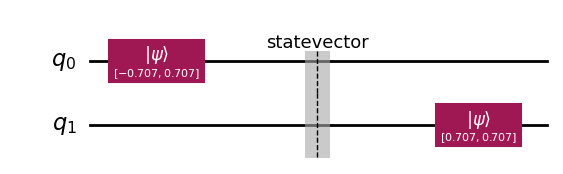

In [7]:
# Draw the circuit
qc.draw('mpl')
plt.show()

In [8]:
# Transpile the circuit for the AerSimulator
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)

In [9]:
# Run the simulation
result = simulator.run(transpiled_circuit).result()

In [10]:
# Get the statevector (using experiment data)
statevector = result.data()['statevector']

In [11]:
# Visualize the statevector using latex (Qiskit 1.0)
# print("Statevector:", latex.latex(statevector))  # Print the latex representation
print("Statevector:", statevector)

Statevector: Statevector([-0.70710678+0.j,  0.70710678+0.j, -0.        +0.j,
              0.        +0.j],
            dims=(2, 2))


In [12]:
# Measure all qubits
qc.measure_all()

In [13]:
# Transpile the circuit with measurement for the AerSimulator
transpiled_circuit_with_measurement = transpile(qc, simulator)
result_with_measurement = simulator.run(transpiled_circuit_with_measurement, shots=1024).result()

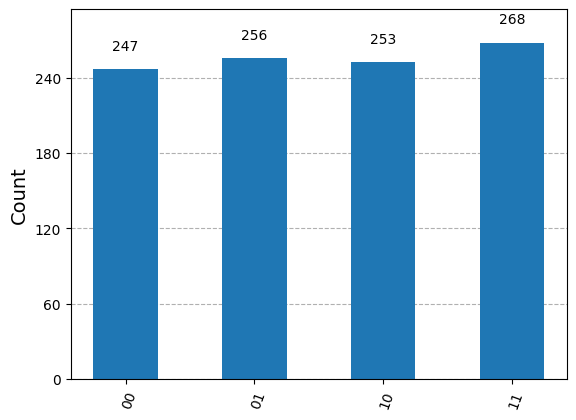

In [14]:
# Get the measurement results
counts = result_with_measurement.get_counts()
plot_histogram(counts)
plt.show()